In [1690]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import copy


In [1691]:
df=pd.read_csv('breast-cancer.csv')
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [1692]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [1693]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [1694]:
df.isnull().any().value_counts()

False    32
Name: count, dtype: int64

In [1695]:
df.shape

(569, 32)

In [1696]:
le=LabelEncoder()
df['diagnosis']=le.fit_transform(df['diagnosis'])

In [1697]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [1698]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [1699]:
x=df.drop(['id','diagnosis'],axis=1)
y=df['diagnosis']

In [1700]:
x.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [1701]:
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [1702]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=31)

In [1703]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [1704]:

y_train=y_train.to_numpy().reshape(-1,1)
y_test=y_test.to_numpy().reshape(-1,1)
x_train=x_train.to_numpy()
x_test=x_test.to_numpy()
mean=np.mean(x_train,axis=0)
std=np.std(x_train,axis=0)
x_train=(x_train-mean)/std
x_test=(x_test-mean)/std

In [1705]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(455, 30) (114, 30) (455, 1) (114, 1)


In [1706]:
x_train=x_train.T
y_train=y_train.T
x_test=x_test.T
y_test=y_test.T

In [1707]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(30, 455) (30, 114) (1, 455) (1, 114)


In [1708]:
def initialize_parameters(n_x,n_h1,n_h2,n_y):
    parameters={}
    W1=np.random.randn(n_h1,n_x)*(np.sqrt(2/n_x))
    b1=np.zeros((n_h1,1))
    W2=np.random.randn(n_h2,n_h1)*(np.sqrt(2/n_h1))
    b2=np.zeros((n_h2,1))
    W3=np.random.randn(n_y,n_h2)*(np.sqrt(2/n_h2))
    b3=np.zeros((n_y,1))
    parameters={'W1':W1,'b1':b1,'W2':W2,'b2':b2,'W3':W3,'b3':b3}
    return parameters


In [1709]:
def initialize_parameters_deep(layers_dims):
    parameters={}
    l=len(layers_dims)
    for i in range(1,l):
        parameters['W'+str(i)]=np.random.randn(layers_dims[i],layers_dims[i-1])*np.sqrt(2/layers_dims[i-1])
        parameters['b'+str(i)]=np.zeros((layers_dims[i],1))
    return parameters


In [1710]:
def linear_forward(A_prev,W,b):
    Z=np.dot(W,A_prev)+b
    linear_cache=(A_prev,W,b)
    return Z,linear_cache

In [1711]:
def sigmoid(Z):
    Z=np.clip(Z,-500,500)
    A=1/(1+np.exp(-Z))
    activation_cache=Z
    return A,activation_cache

In [1712]:
def relu(Z):
    A=np.maximum(0,Z)
    activation_cache=Z
    return A,activation_cache

In [1713]:
def linear_activation_forward(A_prev,W,b,activation):
    if activation=='sigmoid':
        Z,linear_cache=linear_forward(A_prev,W,b)
        A,activation_cache=sigmoid(Z)

    elif activation=='relu':
        Z,linear_cache=linear_forward(A_prev,W,b)
        A,activation_cache=relu(Z)
    
    cache=(linear_cache,activation_cache)
    return A,cache


In [1714]:
def L_model_forward(X,parameters):
    caches=[]
    l=len(parameters)//2
    A=X
    for i in range(1,l):
        A_prev=A
        A,cache=linear_activation_forward(A_prev,parameters['W'+str(i)],parameters['b'+str(i)],'relu')
        caches.append(cache)
    AL,cache=linear_activation_forward(A,parameters['W'+str(l)],parameters['b'+str(l)],'sigmoid')
    caches.append(cache)
    return AL,caches
    



In [1715]:
def compute_cost(AL,Y):
    m=Y.shape[1]
    epsilon=1e-8
    cost=(-1/m)*np.sum(Y*np.log(AL+epsilon)+(1-Y)*np.log(1-AL+epsilon))
    cost=np.squeeze(cost)
    return cost

In [1716]:
def linear_backward(dZ,linear_cache):
    A_prev,W,b=linear_cache
    m=A_prev.shape[1]
    dW=(1/m)*np.dot(dZ,A_prev.T)
    db=(1/m)*np.sum(dZ,axis=1,keepdims=True)
    dA_prev=np.dot(W.T,dZ)
    return dA_prev,dW,db



In [1717]:
def sigmoid_backward(dA, Z):
    A = 1 / (1 + np.exp(-Z))
    dZ = dA * A * (1 - A)
    return dZ

In [1718]:

def relu_backward(dA, Z):
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    return dZ

In [1719]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    Z = activation_cache

    if activation == 'sigmoid':
        dZ = sigmoid_backward(dA, Z)
    elif activation == 'relu':
        dZ = relu_backward(dA, Z)
    
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    return dA_prev, dW, db


In [1720]:
def L_model_backward(Y,AL,caches):
    grads={}
    l=len(caches)
    m=AL.shape[1]
    epsilon=1e-8
    Y=Y.reshape(AL.shape)
    dAL=-(np.divide(Y,AL+epsilon)-np.divide(1-Y,1-AL+epsilon))
    current_cache=caches[l-1]
    dA_prev_temp,dW_temp,db_temp=linear_activation_backward(dAL,current_cache,'sigmoid')
    grads['dA'+str(l-1)]=dA_prev_temp
    grads['dW'+str(l)]=dW_temp
    grads['db'+str(l)]=db_temp

    for i in reversed(range(l-1)):
        current_cache=caches[i]
        dA_prev_temp,dW_temp,db_temp=linear_activation_backward(grads['dA'+str(i+1)],current_cache,'relu')
        grads['dA'+str(i)]=dA_prev_temp
        grads['dW'+str(i+1)]=dW_temp
        grads['db'+str(i+1)]=db_temp

    return grads




In [1721]:
def update_parameters(params,grads,learning_rate):
    parameters=copy.deepcopy(params)
    L=len(parameters)//2
    for l in range(L):
        parameters['W'+str(l+1)]=parameters['W'+str(l+1)]-(learning_rate*grads['dW'+str(l+1)])
        parameters['b'+str(l+1)]=parameters['b'+str(l+1)]-(learning_rate*grads['db'+str(l+1)])
    return parameters
    

In [1722]:
n_x=30
n_h1=20
n_h2=10
n_y=1
layers_dims=(n_x,n_h1,n_h2,n_y)
learning_rate=0.01
num_iters=1000

In [1723]:
def three_layers_NN(X,Y,layers_dims,learning_rate,num_iters):
    costs=[]
    grads={}
    m=X.shape[1]
    (n_x,n_h1,n_h2,n_y)=layers_dims
    parameters=initialize_parameters(n_x,n_h1,n_h2,n_y)
    W1=parameters['W1']
    b1=parameters['b1']
    W2=parameters['W2']
    b2=parameters['b2']
    W3=parameters['W3']
    b3=parameters['b3']

    for i in range(num_iters):
        A1,cache1=linear_activation_forward(X,W1,b1,'relu')
        A2,cache2=linear_activation_forward(A1,W2,b2,'relu')
        A3,cache3=linear_activation_forward(A2,W3,b3,'sigmoid')

        cost=compute_cost(A3,Y)

        dA3=-(np.divide(Y,A3)-(np.divide(1-Y,1-A3)))

        dA2,dW3,db3=linear_activation_backward(dA3,cache3,'sigmoid')
        dA1,dW2,db2=linear_activation_backward(dA2,cache2,'relu')
        dA0,dW1,db1=linear_activation_backward(dA1,cache1,'relu')

        grads['dW1']=dW1
        grads['db1']=db1
        grads['dW2']=dW2
        grads['db2']=db2
        grads['dW3']=dW3
        grads['db3']=db3

        parameters=update_parameters(parameters,grads,learning_rate)

        W1=parameters['W1']
        b1=parameters['b1']
        W2=parameters['W2']
        b2=parameters['b2']
        W3=parameters['W3']
        b3=parameters['b3']

        if len(costs)!=num_iters:
            costs.append(cost)
            print(f'Cost after iteration {i+1}:{cost}')
        else:
            break
    return parameters,costs
        


In [1724]:
parameters,costs=three_layers_NN(x_train,y_train,layers_dims,learning_rate,num_iters)

Cost after iteration 1:0.6757368308130342
Cost after iteration 2:0.665254899221356
Cost after iteration 3:0.6551771546113849
Cost after iteration 4:0.6455050194819333
Cost after iteration 5:0.6363463239291837
Cost after iteration 6:0.627566176689348
Cost after iteration 7:0.6191846137139083
Cost after iteration 8:0.6110999446012726
Cost after iteration 9:0.6031438944296953
Cost after iteration 10:0.5955519546697476
Cost after iteration 11:0.5882893838259801
Cost after iteration 12:0.5812640628445779
Cost after iteration 13:0.5745104903287177
Cost after iteration 14:0.5680636331915944
Cost after iteration 15:0.5618710340486746
Cost after iteration 16:0.5558474892082894
Cost after iteration 17:0.5499358510657857
Cost after iteration 18:0.5442164535545119
Cost after iteration 19:0.5387058898500183
Cost after iteration 20:0.5333977904728078
Cost after iteration 21:0.5282023315444381
Cost after iteration 22:0.5231187368933593
Cost after iteration 23:0.5182010356773081
Cost after iteration 2

Cost after iteration 61:0.3851818817581436
Cost after iteration 62:0.38267676669836537
Cost after iteration 63:0.3802025969727069
Cost after iteration 64:0.37775145120854925
Cost after iteration 65:0.3753413301580559
Cost after iteration 66:0.3729957465665447
Cost after iteration 67:0.3706574341830048
Cost after iteration 68:0.36834499078081795
Cost after iteration 69:0.3660696306127464
Cost after iteration 70:0.3638306538675751
Cost after iteration 71:0.36161019601520805
Cost after iteration 72:0.3593878309544301
Cost after iteration 73:0.35715743935223154
Cost after iteration 74:0.3549746602970479
Cost after iteration 75:0.35283455753079246
Cost after iteration 76:0.3507194068207813
Cost after iteration 77:0.3486256879203624
Cost after iteration 78:0.34656623148622817
Cost after iteration 79:0.34454107103948234
Cost after iteration 80:0.34254254770964115
Cost after iteration 81:0.3405693428439544
Cost after iteration 82:0.33862451132728044
Cost after iteration 83:0.3367004183089255
C

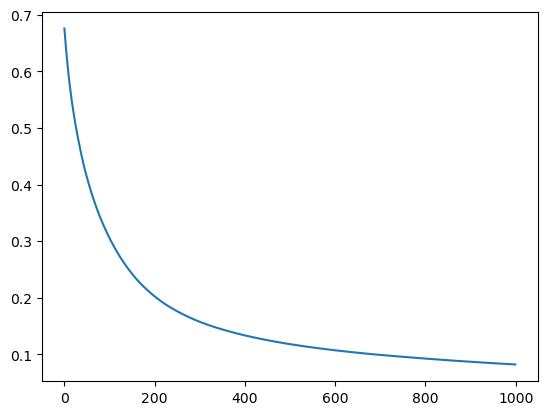

In [1725]:
plt.plot(costs)

In [1726]:
print(parameters)

{'W1': array([[ 1.13298681e-01, -3.21963977e-02, -1.51503339e-01,
         9.14070271e-02, -4.41980358e-01,  5.21547442e-03,
        -2.07017844e-01, -1.51254009e-01, -8.14352602e-02,
         2.55187718e-01, -3.38430009e-02, -1.51258141e-02,
         3.66507124e-01,  1.93772309e-01,  1.27723359e-01,
         4.94141166e-02,  1.97690268e-01,  7.37925170e-02,
        -2.99567703e-01, -2.19270858e-01, -1.64332767e-01,
         2.75572841e-01, -4.60017246e-01, -9.52975041e-02,
         1.74745690e-01,  6.28252676e-02, -8.99748126e-02,
         1.33320158e-02,  1.14211959e-01,  1.88528236e-01],
       [ 8.93744730e-02,  9.31556682e-02,  4.65730545e-01,
        -1.37562355e-01,  1.58419317e-01, -1.64235706e-01,
        -3.27281691e-01,  4.45484204e-01,  3.07525254e-01,
        -2.97789059e-02,  1.30679724e-01,  9.33471759e-02,
         4.70521368e-02, -2.31279763e-02, -2.17043132e-01,
         3.18443963e-01,  5.75769511e-01,  2.43882694e-01,
        -3.73008476e-01, -4.44073953e-01, -1.783

In [1727]:
def predict_three(X,Y,parameters):
    W1=parameters['W1']
    b1=parameters['b1']
    W2=parameters['W2']
    b2=parameters['b2']
    W3=parameters['W3']
    b3=parameters['b3']

    A1,cache1=linear_activation_forward(X,W1,b1,'relu')
    A2,cache2=linear_activation_forward(A1,W2,b2,'relu')
    A3,cache3=linear_activation_forward(A2,W3,b3,'sigmoid')

    predictions=(A3>=0.5).astype(int)
    Accuracy=np.mean(predictions==Y)*100
    print(Accuracy)

In [1728]:
predict_three(x_test,y_test,parameters)

95.6140350877193


In [1729]:
layers_dims=[30,64,32,16,8,1]
num_iters=5000
learning_rate=0.0075


In [1730]:
def L_layer_NN(X,Y,layers_dims,learning_rate,num_iters):
    parameters=initialize_parameters_deep(layers_dims)
    costs=[]

    for i in range(num_iters):
        AL,caches=L_model_forward(X,parameters)
        cost=compute_cost(AL,Y)
        grads=L_model_backward(Y,AL,caches)
        parameters=update_parameters(parameters,grads,learning_rate)
        costs.append(cost)
        if i % 100 == 0:
            print(f"Cost after iteration {i}: {cost}")
        if i % 500 == 0:
            print(f"Iteration {i}: Cost = {cost}")
            print(f"Mean of AL: {np.mean(AL)}, Min: {np.min(AL)}, Max: {np.max(AL)}")
        
    return parameters,costs


In [1731]:
parameters,costs=L_layer_NN(x_train,y_train,layers_dims,learning_rate,num_iters)

Cost after iteration 0: 0.8118396751313687
Iteration 0: Cost = 0.8118396751313687
Mean of AL: 0.40142505170373166, Min: 0.0018103296218152404, Max: 0.7821002689887833


Cost after iteration 100: 0.22309688142984563
Cost after iteration 200: 0.12911931243475702
Cost after iteration 300: 0.09002033679898533
Cost after iteration 400: 0.07311831825860965
Cost after iteration 500: 0.0635337901808031
Iteration 500: Cost = 0.0635337901808031
Mean of AL: 0.3635485641273379, Min: 4.083395510579128e-06, Max: 0.9999999998119875
Cost after iteration 600: 0.056985675491201246
Cost after iteration 700: 0.051944518564115555
Cost after iteration 800: 0.04790370295208621
Cost after iteration 900: 0.04446886037607685
Cost after iteration 1000: 0.0414731995381999
Iteration 1000: Cost = 0.0414731995381999
Mean of AL: 0.3627874085920479, Min: 1.4941232778153812e-07, Max: 0.9999999999997362
Cost after iteration 1100: 0.038739720346033436
Cost after iteration 1200: 0.036322779466808834
Cost after iteration 1300: 0.03413691678484527
Cost after iteration 1400: 0.032136371409635656
Cost after iteration 1500: 0.030321738008721358
Iteration 1500: Cost = 0.030321738008721358
Mean

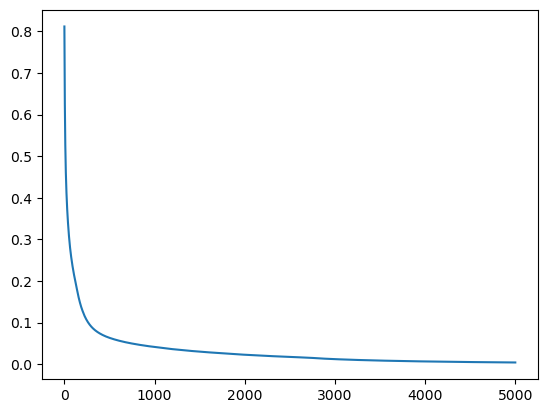

In [1732]:
plt.plot(costs)

In [1733]:
def predict_deep(X,Y,parameters):
    L=len(parameters)//2
    AL,caches=L_model_forward(X,parameters)
    predictions=(AL>0.5).astype(int)
    accuracy=np.mean(predictions==Y)*100
    return AL,predictions,accuracy


In [1734]:
AL_train,predictions_train,accuracy_train=predict_deep(x_train,y_train,parameters)
print(accuracy_train)

100.0


In [1735]:
AL_test,predictions_test,accuracy_test=predict_deep(x_test,y_test,parameters)
print(accuracy_test)

98.24561403508771


In [1736]:
print(predictions_train)

[[1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1
  0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0
  0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0
  0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1
  0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0
  0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0
  0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0
  1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0
  0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0
  0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0
  0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1]]


In [1737]:
print(AL_train)

[[9.99999790e-01 2.20705988e-06 1.58711415e-07 9.99987411e-01
  2.06815211e-03 1.97383598e-06 9.99999773e-01 9.99990853e-01
  1.78312732e-07 1.64054761e-06 8.01252945e-06 9.99999407e-01
  1.00000000e+00 8.73502568e-05 5.09367198e-06 1.06933042e-05
  9.97332407e-01 8.13787350e-09 2.31970146e-09 9.98235490e-01
  9.99999598e-01 1.53197155e-07 7.74438075e-06 9.72135622e-03
  1.67732076e-06 1.10156813e-03 1.18093666e-04 6.83341406e-02
  6.21648398e-05 7.65514131e-05 9.27490668e-06 9.99999837e-01
  9.99655875e-01 2.82945940e-05 2.56809325e-06 1.00000000e+00
  1.76408844e-03 5.99208423e-06 3.19307465e-05 7.23819211e-05
  7.70325939e-05 2.82595995e-05 3.69094186e-04 8.29229660e-04
  1.20117453e-05 4.39588873e-04 2.45671016e-04 1.87982278e-06
  4.88834563e-05 9.99999995e-01 9.99949636e-01 8.02246315e-03
  5.22121300e-05 6.94360782e-07 3.60859321e-05 9.99997621e-01
  1.29532530e-04 9.99998127e-01 9.98914221e-01 9.99938189e-01
  7.09128138e-08 2.30307059e-02 9.99625670e-01 1.75534680e-04
  1.9499

In [1738]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,RocCurveDisplay,roc_auc_score,roc_curve,precision_recall_curve,PrecisionRecallDisplay


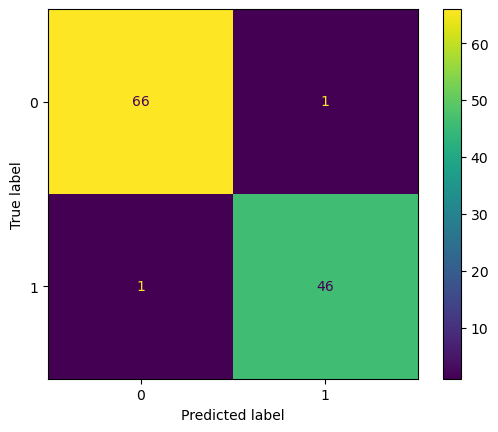

In [1739]:
ConfusionMatrixDisplay.from_predictions(y_test.flatten(),predictions_test.flatten())

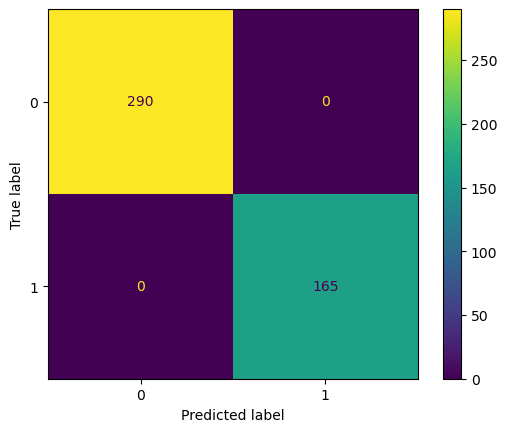

In [1740]:
ConfusionMatrixDisplay.from_predictions(y_train.flatten(),predictions_train.flatten())

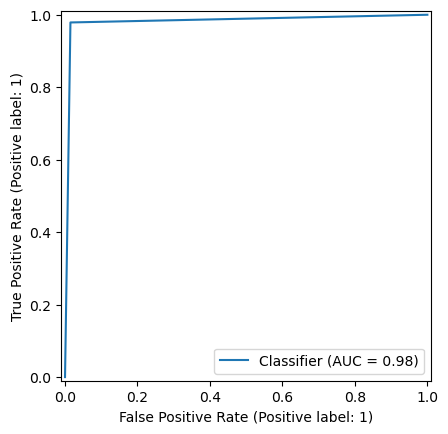

In [1741]:
RocCurveDisplay.from_predictions(y_test.flatten(),predictions_test.flatten())

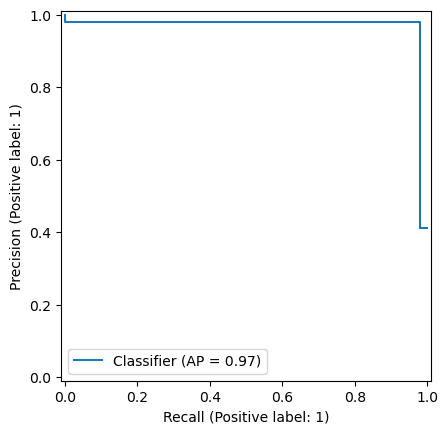

In [1742]:
PrecisionRecallDisplay.from_predictions(y_test.flatten(),predictions_test.flatten())

In [1744]:
print(classification_report(y_test.flatten(),predictions_test.flatten()))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.98      0.98      0.98        47

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

